### Dataset description

The dataset comprises 614 records of diabetes identification data.

In [1]:
from numpy.random import seed
seed(987)
from tensorflow import set_random_seed
set_random_seed(987)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\appdata\

In [2]:
import numpy as np
import pandas as pd

diab_train = pd.read_csv('diabetes_train.csv')
print(diab_train.shape)
print(diab_train.dtypes)
diab_train.head()

(614, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,68,70,32,66,25.0,0.187,25,0
1,1,81,74,41,57,46.3,1.096,32,0
2,0,132,78,0,0,32.4,0.393,21,0
3,5,44,62,0,0,25.0,0.587,36,0
4,8,197,74,0,0,25.9,1.191,39,1


In [3]:
diab_train['Outcome'].value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [4]:
X = diab_train.drop(['Outcome'], axis='columns').values
y = diab_train['Outcome'].values

print(X.shape, y.shape)

(614, 8) (614,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=9)

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

In [7]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [8]:
epochs_num = 600

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

def loss_graph(epochs, train_loss, val_loss):
    x_axis = np.linspace(1, epochs, num=epochs)
    
    plt.figure(figsize=(10, 7))
    plt.plot(x_axis, train_loss, color='b', lw=3, alpha=0.7, label='Train Loss')
    plt.plot(x_axis, val_loss, color='r', lw=3, alpha=0.7, label='Val Loss')
    plt.title('Loss graph')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

In [10]:
from sklearn.model_selection import StratifiedKFold

folds_num = 5
kf = StratifiedKFold(n_splits=folds_num, shuffle=True, random_state=7)
ss = StandardScaler()

X_trains, X_vals, y_trains, y_vals = [], [], [], []
for train_idx, val_idx in kf.split(X, y):
    X_trains.append(ss.fit_transform(X[train_idx]))
    X_vals.append(ss.transform(X[val_idx]))
    y_trains.append(y[train_idx])
    y_vals.append(y[val_idx])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Method 0
Method 1
Method 2
Method 3


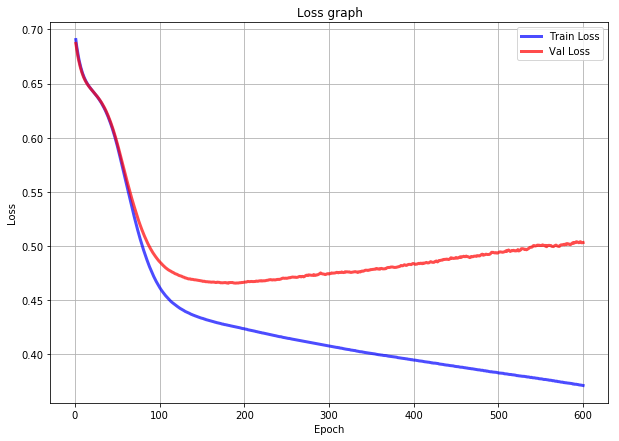

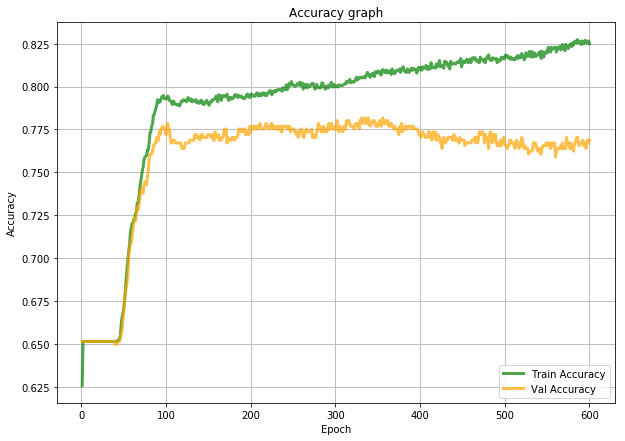

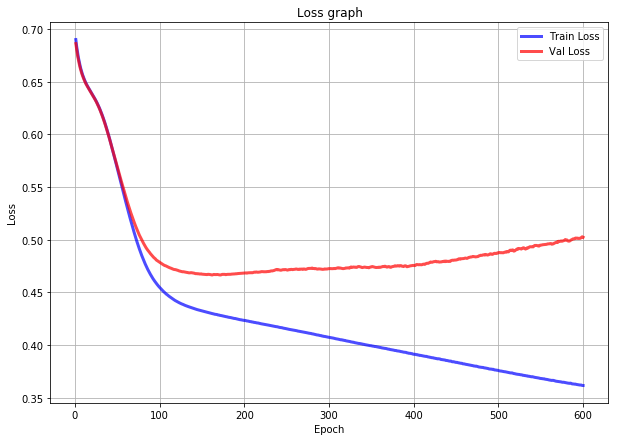

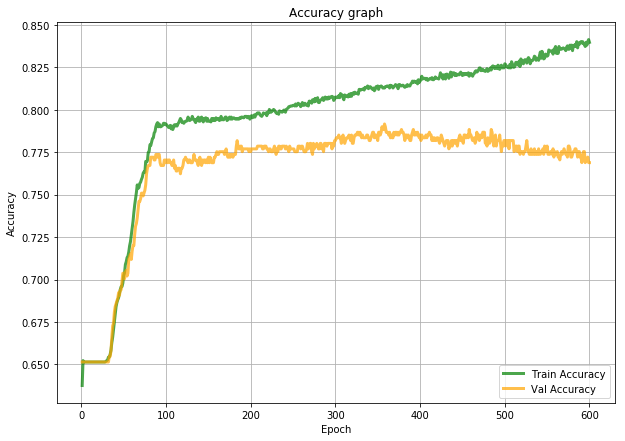

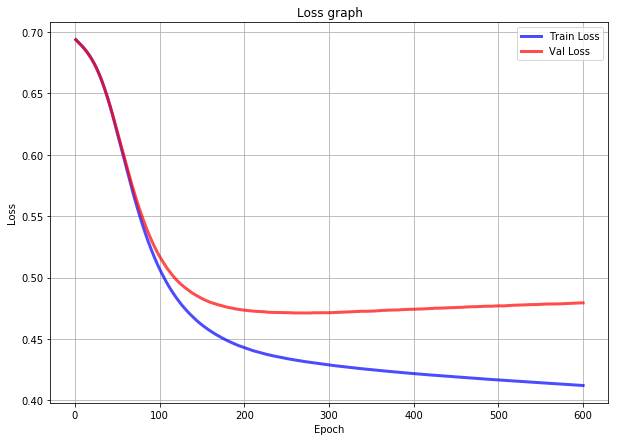

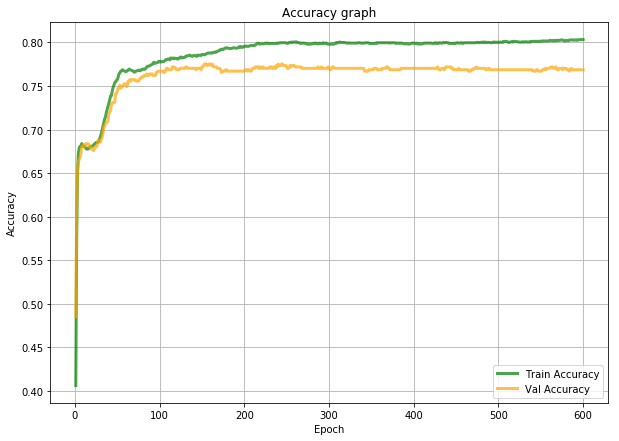

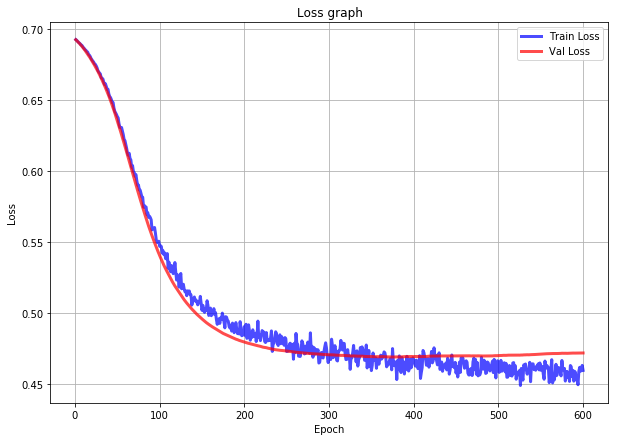

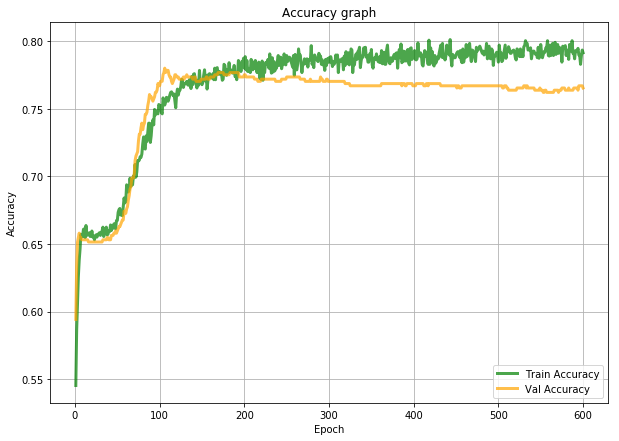

In [11]:
from keras.callbacks import Callback

def get_nn_0():
    input_layer = Input(shape=(8,))
    dense1 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(input_layer)
    dense2 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(dense1)
    output_layer = Dense(units=1, activation='sigmoid')(dense2)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    
    return model


def get_nn_1():
    input_layer = Input(shape=(8,))
    dense1 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(input_layer)
    dense2 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(dense1)
    output_layer = Dense(units=1, activation='sigmoid')(dense2)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    
    return model


def get_nn_2():
    input_layer = Input(shape=(8,))
    dense1 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(input_layer)
    dense2 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(dense1)
    output_layer = Dense(units=1, activation='sigmoid')(dense2)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])
    
    return model


def get_nn_3():
    input_layer = Input(shape=(8,))
    dense1 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(input_layer)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(units=20, activation='relu', kernel_initializer='random_uniform')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    output_layer = Dense(units=1, activation='sigmoid')(dropout2)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])
    
    return model


class CustomCallback(Callback):
    def on_train_begin(self, logs={}):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

        
custom_callback = CustomCallback()

result = {}

def get_nn(i):
    if i == 0:
        return get_nn_0()
    if i == 1:
        return get_nn_1()
    if i == 2:
        return get_nn_2()
    if i == 3:
        return get_nn_3()

for n in range(0, 4):
    train_loss = np.zeros((folds_num, epochs_num))
    val_loss = np.zeros((folds_num, epochs_num))
    train_acc = np.zeros((folds_num, epochs_num))
    val_acc = np.zeros((folds_num, epochs_num))

    for i in range(len(X_trains)):
        nn = get_nn(n)
        nn.fit(X_trains[i],
               y_trains[i],
               epochs=epochs_num,
               batch_size=32,
               validation_data=(X_vals[i], y_vals[i]),
               shuffle=True,
               callbacks=[custom_callback],
               verbose=0)

        train_loss[i] = custom_callback.train_loss
        val_loss[i] = custom_callback.val_loss
        train_acc[i] = custom_callback.train_acc
        val_acc[i] = custom_callback.val_acc
    
    mean = {}
    
    mean['train_loss_mean'] = train_loss.mean(axis=0).ravel()
    mean['val_loss_mean'] = val_loss.mean(axis=0).ravel()
    mean['train_acc_mean'] = train_acc.mean(axis=0).ravel()
    mean['val_acc_mean'] = val_acc.mean(axis=0).ravel()
    
    result[n] = mean

def accuracy_graph(epochs, train_acc, val_acc):
    x_axis = np.linspace(1, epochs, num=epochs)
    
    plt.figure(figsize=(10, 7))
    plt.plot(x_axis, train_acc, color='g', lw=3, alpha=0.7, label='Train Accuracy')
    plt.plot(x_axis, val_acc, color='orange', lw=3, alpha=0.7, label='Val Accuracy')
    plt.title('Accuracy graph')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    
for i in range(0, 4):
    print('Method ' + str(i))

    loss_graph(epochs_num, result[i]['train_loss_mean'], result[i]['val_loss_mean'])
    accuracy_graph(epochs_num, result[i]['train_acc_mean'], result[i]['val_acc_mean'])

In [12]:
opt_numbers = []

for i in range(0, 4):
    optimal_epoch_num = np.argmin(result[i]['val_loss_mean'])
    opt_numbers.append(optimal_epoch_num)
    
    print('Method ' + str(i))
    print('Optimal number of epochs: {0}\nValidation loss = {1:.3f}\nValidation accuracy = {2:.3f}'
      .format(optimal_epoch_num, result[i]['val_loss_mean'][optimal_epoch_num], result[i]['val_acc_mean'][optimal_epoch_num]))
    print('\n')

Method 0
Optimal number of epochs: 180
Validation loss = 0.466
Validation accuracy = 0.769


Method 1
Optimal number of epochs: 161
Validation loss = 0.467
Validation accuracy = 0.774


Method 2
Optimal number of epochs: 266
Validation loss = 0.471
Validation accuracy = 0.772


Method 3
Optimal number of epochs: 374
Validation loss = 0.469
Validation accuracy = 0.769




Having optimal number of epochs found let's test our model on test dataset. 

In [13]:
X_ready = ss.fit_transform(X)

networks = []

for i in range(0, 4):
    nn = get_nn(i)
    nn.fit(X_ready, y, epochs=opt_numbers[i], batch_size=32, shuffle=True, verbose=0)
    networks.append(nn)

In [14]:
diab_test = pd.read_csv('diabetes_test.csv')
X_test = diab_test.drop(['Outcome'], axis='columns').values
y_test = diab_test['Outcome'].values

X_test = ss.transform(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cms = []

for i in range(0, 4):
    nn = networks[i]
    
    y_test_proba = nn.predict_on_batch(X_test)
    y_test_pred = np.where(y_test_proba > 0.5, 1, 0)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print('Method ' + str(i))

    print('Metrics on test set:\nAccuracy = {0:.2f}\nPrecision = {1:.2f}\nRecall = {2:.2f}\nF1 = {3:.2f}'
          .format(test_accuracy, test_precision, test_recall, test_f1))
    
    print('\n')
    
    cms.append(confusion_matrix(y_test, y_test_pred))

Method 0
Metrics on test set:
Accuracy = 0.71
Precision = 0.59
Recall = 0.56
F1 = 0.57


Method 1
Metrics on test set:
Accuracy = 0.71
Precision = 0.58
Recall = 0.59
F1 = 0.59


Method 2
Metrics on test set:
Accuracy = 0.72
Precision = 0.61
Recall = 0.57
F1 = 0.59


Method 3
Metrics on test set:
Accuracy = 0.72
Precision = 0.60
Recall = 0.59
F1 = 0.60




In [16]:
import seaborn as sns

def plot_confusion_matrix_sns(cm):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.heatmap(cm, annot=True, ax=ax, cmap='GnBu')
    ax.set_ylabel('True', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)

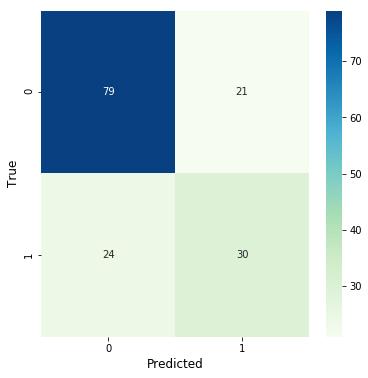

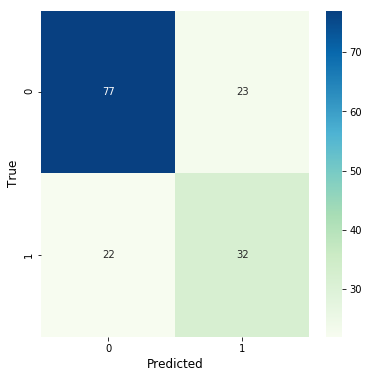

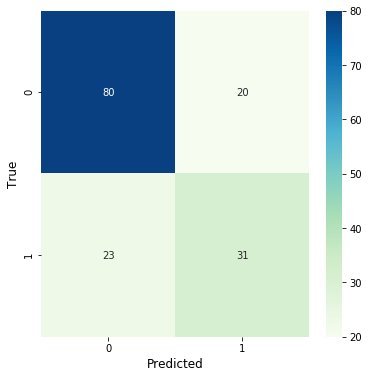

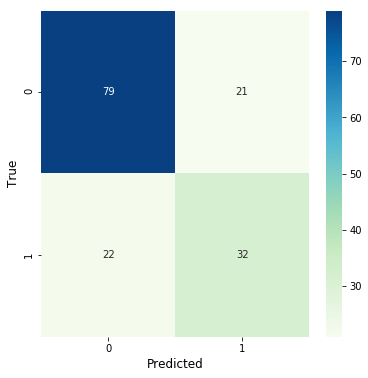

In [17]:
for cm in cms:
    plot_confusion_matrix_sns(cm)

### Conclusion

We have tried 4 variations of neural networks with different number of dense units and different types of optimizer functions. They all 